# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


# VitD_Levels

In [4]:
mean_vit = df["VitD_levels"].mean()
med_vit = df["VitD_levels"].median()
std_vit = df["VitD_levels"].std()
plus_one_std_vit = mean_vit + std_vit
minus_one_std_vit = mean_vit - std_vit

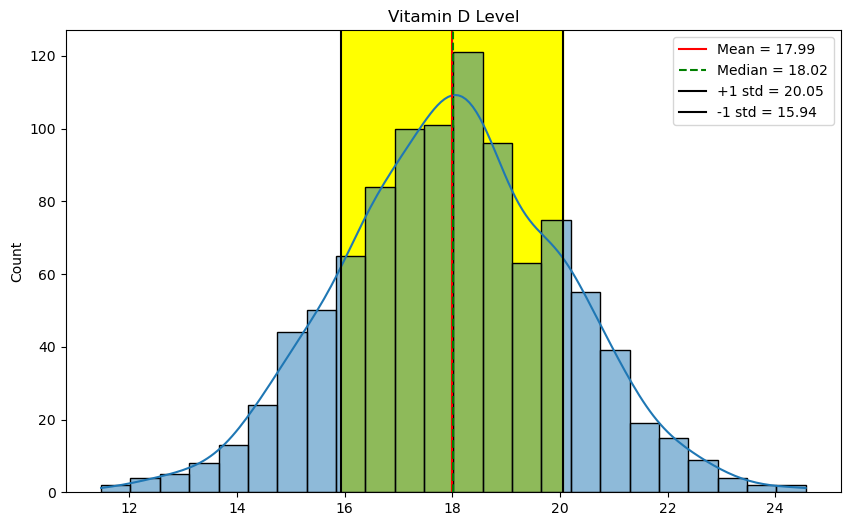

In [5]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df["VitD_levels"], ax = ax, kde = True)
ax.axvline(mean_vit, color = "red", label = f'Mean = {mean_vit:,.2f}')
ax.axvline(med_vit, ls='--', color = 'green', label = f'Median = {med_vit:,.2f}')
ax.axvline(plus_one_std_vit, color = 'black',label=f'+1 std = {plus_one_std_vit:,.2f}')
ax.axvline(minus_one_std_vit, color = 'black', label = f'-1 std = {minus_one_std_vit:,.2f}')
ax.axvspan(plus_one_std_vit, minus_one_std_vit, color = 'yellow', zorder = 0)
ax.set_title('Vitamin D Level')
ax.set(xlabel = None)
ax.legend();


- This data is continuous.
- Has no screw, normal.
- With a number above 3, this type of kurtosis is Platykurtic.

In [6]:
from scipy import stats
kurt_vit = stats.kurtosis(df["VitD_levels"], fisher = False)
kurt_vit

3.013147515833447

# Doc_Visits

In [7]:
mean_doc = df["Doc_visits"].mean()
med_doc = df["Doc_visits"].median()
std_doc = df["Doc_visits"].std()
plus_one_std_doc = mean_doc + std_doc
minus_one_std_doc = mean_doc - std_doc


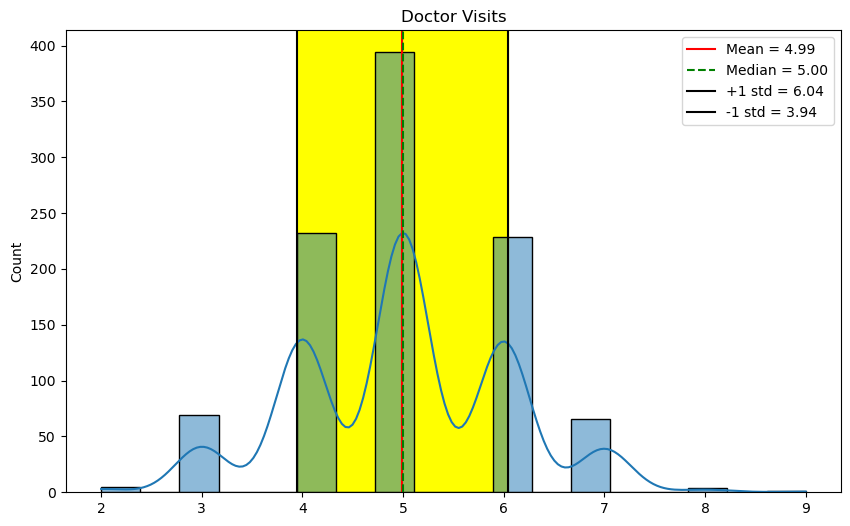

In [8]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df["Doc_visits"], ax = ax, kde = True)
ax.axvline(mean_doc, color = "red", label = f'Mean = {mean_doc:,.2f}')
ax.axvline(med_doc, ls='--', color = 'green', label = f'Median = {med_doc:,.2f}')
ax.axvline(plus_one_std_doc, color = 'black',label=f'+1 std = {plus_one_std_doc:,.2f}')
ax.axvline(minus_one_std_doc, color = 'black', label = f'-1 std = {minus_one_std_doc:,.2f}')
ax.axvspan(plus_one_std_doc, minus_one_std_doc, color = 'yellow', zorder = 0)
ax.set_title('Doctor Visits')
ax.set(xlabel = None)
ax.legend();

- This data is continuous, it shows gaps but only because we are zoomed in on a certain amount of visits, from 0-9. 
- Has no screw, normal.
- With a number below 3, this type of kurtosis is Leptokurtic.

In [9]:
kurt_doc = stats.kurtosis(df["Doc_visits"], fisher = False)
kurt_doc

2.9919958083381206

# TotalCharge

In [10]:
mean_tot_charge = df["TotalCharge"].mean()
med_tot_charge = df["TotalCharge"].median()
std_tot_charge = df["TotalCharge"].std()
plus_one_std_tot_charge = mean_tot_charge + std_tot_charge
minus_one_std_tot_charge = mean_tot_charge - std_tot_charge


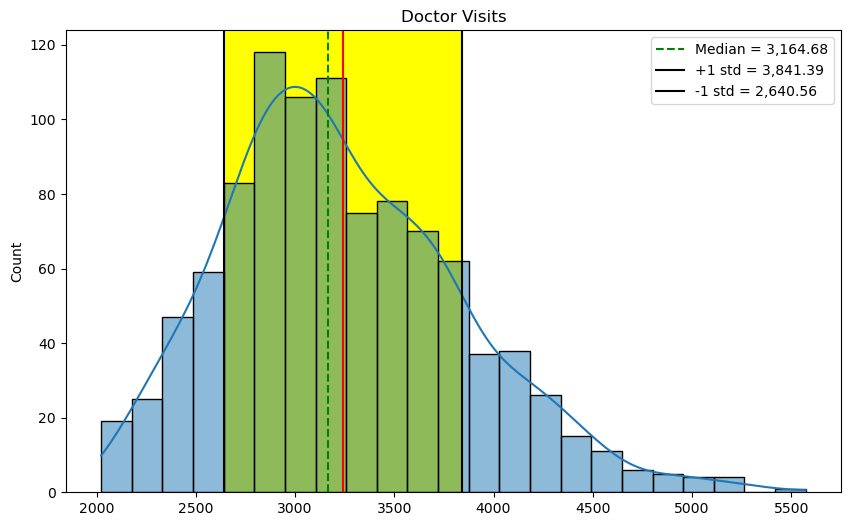

In [11]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df["TotalCharge"], ax = ax, kde = True)
ax.axvline(mean_tot_charge, color = "red")
ax.axvline(med_tot_charge, ls='--', color = 'green', label = f'Median = {med_tot_charge:,.2f}')
ax.axvline(plus_one_std_tot_charge, color = 'black',label=f'+1 std = {plus_one_std_tot_charge:,.2f}')
ax.axvline(minus_one_std_tot_charge, color = 'black', label = f'-1 std = {minus_one_std_tot_charge:,.2f}')
ax.axvspan(plus_one_std_tot_charge, minus_one_std_tot_charge, color = 'yellow', zorder = 0)
ax.set_title('Doctor Visits')
ax.set(xlabel = None)
ax.legend();

- This data is continuous.
- Has positive skew.
- With a number above 3, this type of kurtosis is Platykurtic.

In [12]:
kurt_tot_charge = stats.kurtosis(df["TotalCharge"], fisher = False)
kurt_tot_charge

3.2650077463439384